<a href="https://colab.research.google.com/github/t-sommer/fmpy-tutorial/blob/master/simple_cooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib notebook

In [2]:
# Install dependencies
!pip install fmpy
from fmpy import *

In [3]:

# Download the FMU
from fmpy.util import download_file
filename = download_file('https://github.com/t-sommer/fmpy-tutorial/raw/master/SimpleCooling.fmu')

In [4]:
filename = 'SimpleCooling.fmu'

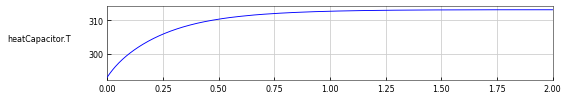

In [5]:
result = simulate_fmu(filename, start_values={'thermalConductance.k': 1}, output=['heatCapacitor.T'], stop_time=2)
plot_result(result)

In [8]:
import shutil
import numpy as np


x = np.linspace(2, 20, 10)
y = np.linspace(1, 10, 10)

X, Y = np.meshgrid(x, y, indexing='ij')
Z = np.zeros_like(X)

unzipdir = extract(filename)
model_description = read_model_description(filename)

for i, j in np.ndindex(X.shape):
    t_k = X[i, j]
    v_k = Y[i, j]
    result = simulate_fmu(unzipdir,
                          model_description=model_description,
                          start_values={'thermalConductance.k': t_k, 'volumeFlow.k': v_k},
                          output=['heatCapacitor.T'],
                          stop_time=2)
    z = result['heatCapacitor.T'][-1]
    Z[i, j] = z

shutil.rmtree(unzipdir, ignore_errors=True)

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


fig = make_subplots(rows=1, cols=1, subplot_titles=('heatCapacitor.T [°C] after 2 s',))
fig.add_trace(go.Contour(x=x, y=y, z=Z-273.15), 1, 1)
fig['layout']['xaxis1'].update(title='thermalConductance.k')
fig['layout']['yaxis1'].update(title='volumeFlow.k')
fig.show()